# **Prophet Model from Facebook to be used in Time Series Analysis**


In [82]:
# import libraries 
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly.express as px

In [111]:
# import the dataset 
df = pd.read_csv(".\Daily Climate Data for prophet model\DailyDelhiClimateTrain.csv")
# head of the data
df.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          1462 non-null   object 
 1   meantemp      1462 non-null   float64
 2   humidity      1462 non-null   float64
 3   wind_speed    1462 non-null   float64
 4   meanpressure  1462 non-null   float64
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [85]:
# import the dataset 
df = pd.read_csv(".\Daily Climate Data for prophet model\DailyDelhiClimateTrain.csv" , index_col='date' , parse_dates=True)
# info of the data
df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [86]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


In [87]:
df.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


<Axes: xlabel='date', ylabel='meantemp'>

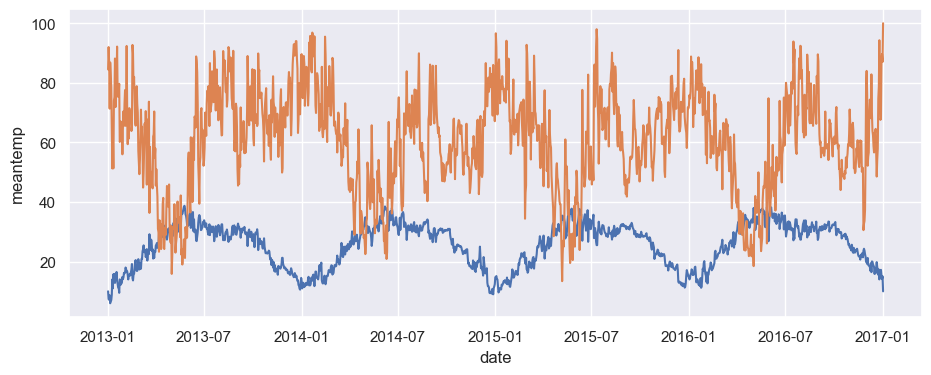

In [88]:
# draw the line plot between date and temperature 
sns.set(rc={'figure.figsize' :(11,4)} , font_scale=1 , style='darkgrid')
sns.lineplot(data=df , x = df.index , y = 'meantemp')
sns.lineplot(data=df , x = df.index , y = 'humidity')

In [89]:
px.line(data_frame= df , x = df.index , y = 'meantemp')


In [90]:
# make a plot of scatter b/w meantemp and humidity
fig  = px.scatter(df , x='meantemp' , y = 'humidity' , title="Mean Temperature VS Humidity" ,
                trendline='ols' , trendline_color_override='red')
fig.show()

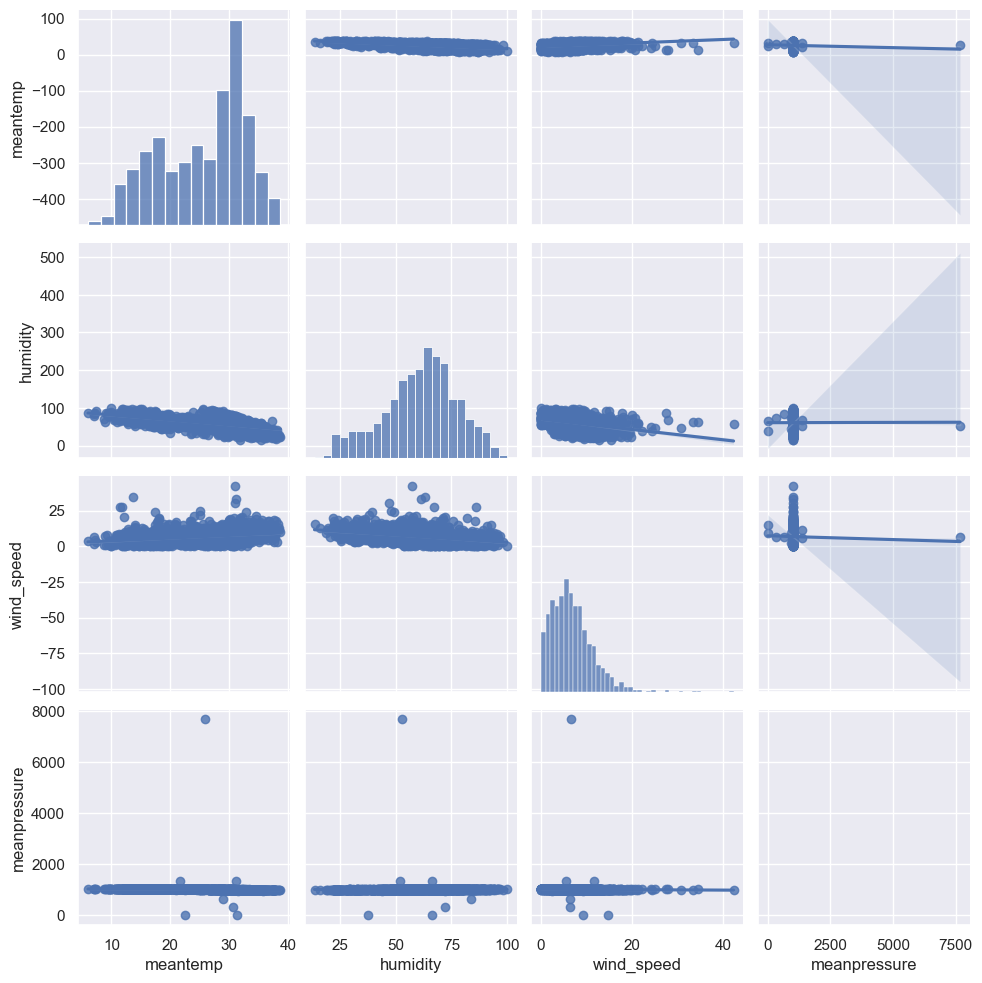

In [91]:
sns.pairplot(df , kind='reg')

<Axes: >

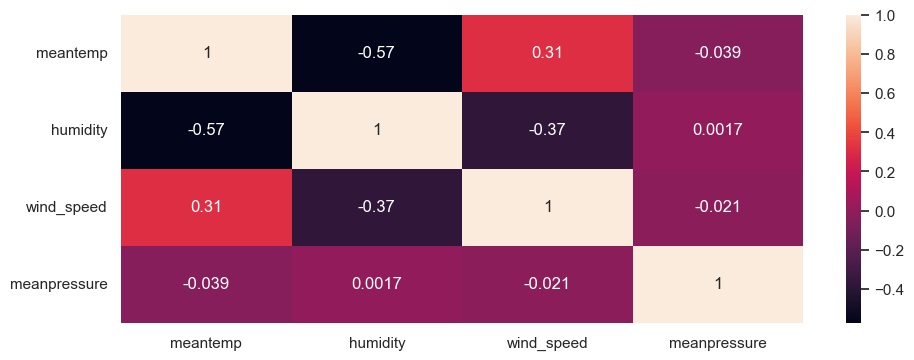

In [92]:
# HEAT MAP
sns.heatmap(df.corr() , annot=True )

In [93]:
# Let's Scale the data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df) , columns=df.columns , index=df.index)
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.025321
2013-01-02,-2.463454,1.862828,-0.838196,0.037162
2013-01-03,-2.495219,1.564569,-0.475626,0.041972
2013-01-04,-2.291015,0.630022,-1.221233,0.033647
2013-01-05,-2.654044,1.554627,-0.680303,0.029946


<Axes: xlabel='date', ylabel='meantemp'>

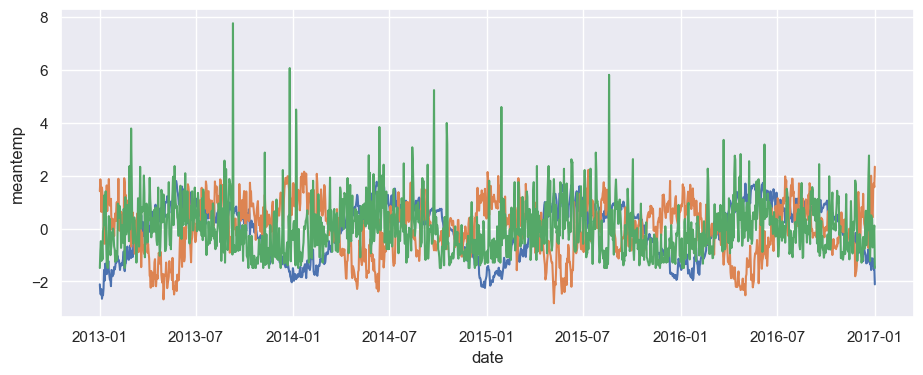

In [94]:
# draw the line plot between date and temperature 
sns.set(rc={'figure.figsize' :(11,4)} , font_scale=1 , style='darkgrid')
sns.lineplot(data=df_scaled , x = df_scaled.index , y = 'meantemp')
sns.lineplot(data=df_scaled , x = df_scaled.index , y = 'humidity')
sns.lineplot(data=df_scaled , x = df_scaled.index , y = 'wind_speed')
# sns.lineplot(data=df_scaled , x = df_scaled.index , y = 'meanpressure')

In [95]:
px.line(data_frame= df , x = df.index , y = 'meanpressure')


In [96]:
# interpolate the outliers from mean pressure column on 28.march.2016
df.loc['2016-03-28' , 'meanpressure'] = np.nan
df['meanpressure'] = df['meanpressure'].interpolate(method='time')
df.loc['2016-03-28']

meantemp          25.933333
humidity          52.800000
wind_speed         6.546667
meanpressure    1012.062500
Name: 2016-03-28 00:00:00, dtype: float64

In [97]:
px.line(data_frame= df , x = df.index , y = 'meanpressure')


In [98]:
# add two columns in the dataset for month and year
df_scaled['month'] = df_scaled.index.month
df_scaled['year'] = df_scaled.index.year
df_scaled.head(5)

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,-2.109500,1.415439,-1.491699,0.025321,1,2013
2013-01-02,-2.463454,1.862828,-0.838196,0.037162,1,2013
2013-01-03,-2.495219,1.564569,-0.475626,0.041972,1,2013
2013-01-04,-2.291015,0.630022,-1.221233,0.033647,1,2013
2013-01-05,-2.654044,1.554627,-0.680303,0.029946,1,2013


<Axes: xlabel='month', ylabel='meantemp'>

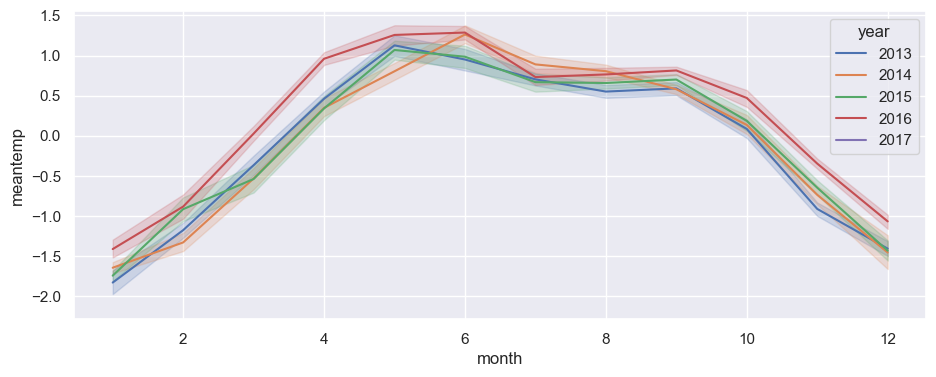

In [99]:
sns.lineplot(data =df_scaled , x = 'month' , y = 'meantemp' , hue='year' , palette='deep')

In [110]:
# add two columns in the dataset for month and year
df['month'] = df_scaled.index.month
df['year'] = df_scaled.index.year
df.head(5)

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667,1,2013
2013-01-02,7.400000,92.000000,2.980000,1017.800000,1,2013
2013-01-03,7.166667,87.000000,4.633333,1018.666667,1,2013
2013-01-04,8.666667,71.333333,1.233333,1017.166667,1,2013
2013-01-05,6.000000,86.833333,3.700000,1016.500000,1,2013


# **Lets Use The Prophet Model from Python**

In [107]:
pip install prophet

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: prophet in c:\users\glow computers\miniconda3\envs\machineeda\lib\site-packages (1.1.5)



In [113]:
df.rename(columns={'date':'ds' , 'meantemp':'y'})


,ds,y,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000
...,...,...,...,...,...
1457,2016-12-28,17.217391,68.043478,3.547826,1015.565217
1458,2016-12-29,15.238095,87.857143,6.000000,1016.904762
1459,2016-12-30,14.095238,89.666667,6.266667,1017.904762
1460,2016-12-31,15.052632,87.000000,7.325000,1016.100000


In [116]:
from prophet import Prophet
from prophet.plot import plot_plotly, plot_components_plotly  # Corrected the import statement for component plots
import pandas as pd

# Assume df is your initial dataframe
# Ensure the columns are correctly renamed
df = df.rename(columns={'date': 'ds', 'meantemp': 'y'})

# Initialize the model
model = Prophet()
model.fit(df)

# Create a dataframe for future dates
future = model.make_future_dataframe(periods=365)

# Make predictions
forecast = model.predict(future)

# Plot the forecast using Plotly
fig = plot_plotly(model, forecast)
fig.show()

# Plot the components of the forecast
components_fig = plot_components_plotly(model, forecast)
components_fig.show()


00:50:35 - cmdstanpy - INFO - Chain [1] start processing
00:50:45 - cmdstanpy - INFO - Chain [1] done processing


In [117]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2013-01-01,24.671414,9.148597,14.328264,24.671414,24.671414,-12.940009,-12.940009,-12.940009,0.034152,0.034152,0.034152,-12.974161,-12.974161,-12.974161,0.0,0.0,0.0,11.731405
1,2013-01-02,24.671625,9.112540,14.406018,24.671625,24.671625,-12.803787,-12.803787,-12.803787,0.146333,0.146333,0.146333,-12.950120,-12.950120,-12.950120,0.0,0.0,0.0,11.867838
2,2013-01-03,24.671836,9.236526,14.464223,24.671836,24.671836,-12.843663,-12.843663,-12.843663,0.067182,0.067182,0.067182,-12.910845,-12.910845,-12.910845,0.0,0.0,0.0,11.828173
3,2013-01-04,24.672047,9.415230,14.478769,24.672047,24.672047,-12.830774,-12.830774,-12.830774,0.027514,0.027514,0.027514,-12.858288,-12.858288,-12.858288,0.0,0.0,0.0,11.841273
4,2013-01-05,24.672258,9.531376,14.563566,24.672258,24.672258,-12.863631,-12.863631,-12.863631,-0.069183,-0.069183,-0.069183,-12.794448,-12.794448,-12.794448,0.0,0.0,0.0,11.808626
